In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import Tuple

from tsp import TSP
from solvers import AntSystemSolver, AntColonySystemSolver
from visualization import *

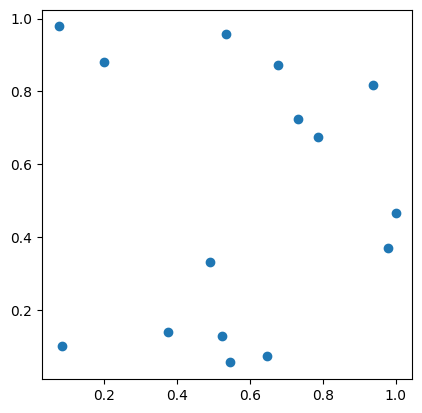

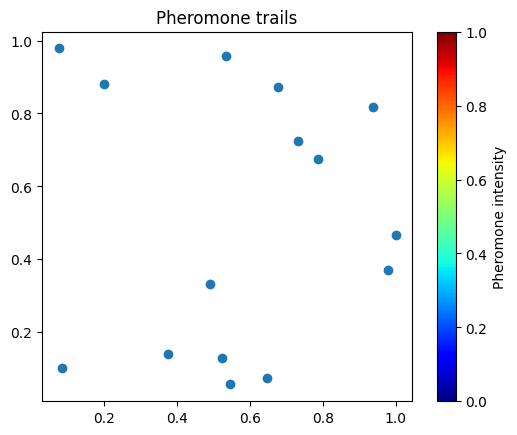

In [3]:
# debugging

# square
# cities = np.array([[2, 1], [2, 2], [1, 1], [1, 2]])
# tsp = TSP.from_instance(cities)

# circle
# cities = np.array([[0, 1], [0.25, 0.5], [0.3232, 0.3232], [0.5, 0.25], [0.6768, 0.3232], [0.75, 0.5], [1, 1]])
# tsp = TSP.from_instance(cities)

# random
tsp = TSP.random_instance(15)

solver = AntColonySystemSolver(tsp)

plot_solution(tsp.cities, save_dir=None)
plot_pheromone_trails(tsp.cities, solver.pheromones, save_dir=None)

In [4]:
NUM_IT = 1000
least_cost = np.inf
avg_costs = {
    'train': [],
    'val': []
}
for it in range(NUM_IT):
    # sampling a batch of solutions for training
    train_tours = solver.sample(local_update_strategy='ACS')
    train_costs = tsp.evaluate(train_tours)
    avg_costs['train'].append(np.mean(train_costs))

    # getting a batch of solutions using greedy strategy for validation
    val_tours = solver.sample(strategy='greedy', apply_local_pheromone_update=False)
    val_costs = tsp.evaluate(val_tours)
    avg_costs['val'].append(np.mean(val_costs))

    # selecting the best tour from validation
    best_tour = val_tours[np.argmin(val_costs)]
    min_val_cost = np.min(val_costs)
    if min_val_cost < least_cost:
        least_cost = min_val_cost
        print(f'--> Best tour so far: {best_tour}, cost: {least_cost}, it: {it},')
    
    # plotting
    if it % 25 == 0:
        plot_solution(tsp.cities, val_tours[np.argmin(val_costs)], np.min(val_costs), save_dir=f'results/tours/tour_{it}')
        plot_pheromone_trails(tsp.cities, solver.pheromones, save_dir=f'results/pheromones/trails_{it}')
        #print(f'Iteration {it}: avg train cost: {avg_costs['train']}, avg val cost: {avg_costs['val']}')
        #plt.show()
        #plt.close()
    
    # updating the pheromone matrix
    solver.update_pheromone(train_tours)

plot_mean_cost(avg_costs['val'], save_dir=f'results/costs/costs_{it}')
plt.close()

/tmp/ipykernel_15367/3670070958.py:123: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.pheromones[edge] = (1 - self.rho) * self.pheromones[edge] + self.delta_phero[strategy](edge, ~visited_cities)
/tmp/ipykernel_15367/3670070958.py:78: RuntimeWarning: invalid value encountered in divide
  default_probabilities = default_probabilities / default_probabilities.sum() # normalizing again after removing the probability of the chosen city


--> Best tour so far: [ 2 13 10  3  7  1  8  5  4 11  9  6 12  0 14], cost: 4.781667427574506, it: 0,
--> Best tour so far: [11  9  0  6 12 14  3  5  4 13  2  7 10  1  8], cost: 4.2065211215753795, it: 2,
--> Best tour so far: [ 1  8 10  2 13  3  7  5 11  9  4  0 12  6 14], cost: 4.094396316697499, it: 13,
--> Best tour so far: [ 8  1 10  2  7 13  3 14  9 12 11  5  4  0  6], cost: 3.9600867674096287, it: 19,
--> Best tour so far: [ 8  1 10  2  7  3 13 11  9 14 12  5  4  0  6], cost: 3.859105396081561, it: 31,
--> Best tour so far: [ 8  1 10  2  7  3 13 14 11  9  6 12  0  4  5], cost: 3.7456850392685546, it: 68,


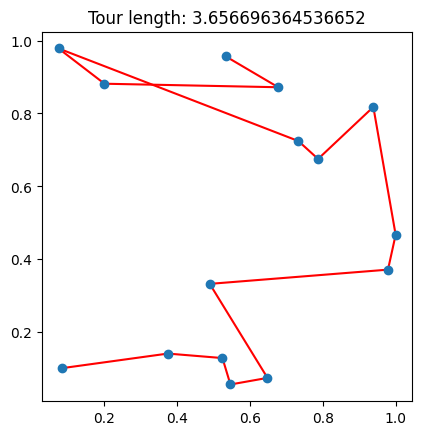

In [5]:
plot_solution(tsp.cities, solver.best_tour, solver.min_cost)